## Converting Temperatures from Celsius to Farenheit

In [109]:
# Importing the necessary libraries
import tensorflow as tf
import numpy as np
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) #Only logs in errors

In [110]:
# Creating a numpy array
celcius_table = np.array([0, 18, 15, 22, 38], dtype=float)
farenheit_table = np.array([32, 46.4, 59, 71.6, 100.4], dtype=float)

In [111]:
# Print a corresponding table
print("Table consisting of temperatures in degrees celcius to farenheit; ")

for far, degree in enumerate (celcius_table):

    print(f"Celcius {degree}: farenheit_table {farenheit_table[far]}")

Table consisting of temperatures in degrees celcius to farenheit; 
Celcius 0.0: farenheit_table 32.0
Celcius 18.0: farenheit_table 46.4
Celcius 15.0: farenheit_table 59.0
Celcius 22.0: farenheit_table 71.6
Celcius 38.0: farenheit_table 100.4


## Build a layer

- They provide a high level API that makes it easy to construct a neural network.

- Neural Networks are computational models that mimic the complex functions of the human brain.

In [112]:
# Celcius_table is the feature while farenheit_table is the label.
"""
units- This is the number of neurons or input variables that the model has to learn.
input_shape - It is the shape of the input variable
"""
conversion_model = tf.keras.layers.Dense(units=1, input_shape=[1])

## Assemble Layers into the model

- Assembling the defined layers into one model.

In [113]:
conversion_model = tf.keras.Sequential([conversion_model])

In [114]:
# Another method can be defining the layers inside the model definition
conversion_model = tf.keras.Sequential(tf.keras.layers.Dense(units=1, input_shape=[1]))

## Compile the model with loss and optimizer functions

- Loss function is a function that helps to detect how far off the predictions are from the actual values.

- Optimizer function is a function used to adjust the parameters of a model and optimize the loss function.

- 0.1 is the learning rate taken to find a good value. The most common steps are 0.001 (default) to 0.1

In [115]:
conversion_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

## Fitting the model

- epochs specifies the number of iterations.

- verbose controls the amount of output the method produces.

In [116]:
final_conversion_model = conversion_model.fit(celcius_table, farenheit_table, epochs=1000, verbose=False)

KeyboardInterrupt: 

## Display Training Statistics

<Axes: xlabel='Number of Epochs', ylabel='Loss Magnitude'>

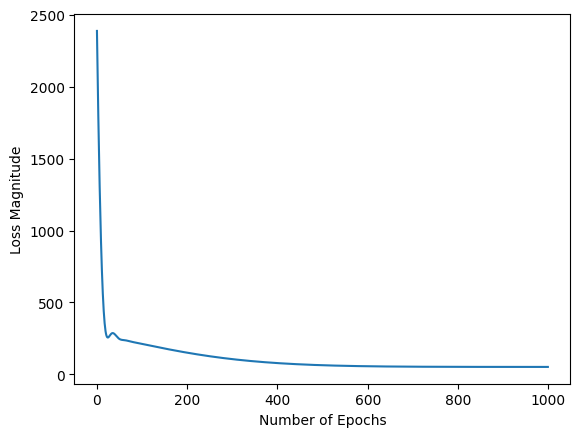

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xlabel("Number of Epochs")
plt.ylabel("Loss Magnitude")
sns.lineplot(final_conversion_model.history['loss'])

## Prediction

- The formula is (C * 1.8) + 32 hence the weights should be (1.8, 32)

In [ ]:
# Assuming YourTrainedModel is an instance of your trained model class
prediction_fahrenheit = conversion_model.predict([100.0])
print(f"Prediction for value degrees Celsius is {prediction_fahrenheit[0]} in Fahrenheit.")


1/1 [==============================] - 0s 204ms/step
Prediction for value degrees Celsius is [210.5549] in Fahrenheit.


In [ ]:
print(conversion_model.get_weights())

[array([[1.8277446]], dtype=float32), array([27.780449], dtype=float32)]


## Using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

In [ ]:
X = celcius_table
y = farenheit_table

In [ ]:
X_train_reshaped = X.reshape(-1, 1)

In [ ]:
sklearn_model = LinearRegression()

sklearn_model.fit(X_train_reshaped, y)

LinearRegression()

In [ ]:
predict_value = np.array([100.0])

predict_value = predict_value.reshape(-1, 1)

In [ ]:
sklearn_model.predict(predict_value)

array([209.57655246])

In [ ]:
sklearn_model.coef_

array([1.81445396])

From the comparison of the two predictions and weights, it is clear that application of nueral networks is better than the traditional Machine Learning methods.